Problem Selection: Predicting House Prices
We'll use the Ames Housing Dataset, a well-known dataset for regression tasks. It contains detailed information about houses, including size, location, and various features, making it ideal for understanding and preprocessing real-world data.

Dataset Link:
Ames Housing Dataset (Kaggle)

Step 1: Dataset Understanding & Preprocessing

We'll:
✅ Load and explore the dataset.

✅ Perform EDA (distribution, missing values, correlations).

✅ Handle missing values.

✅ Perform feature engineering (categorical encoding, scaling).

✅ Split data into train and test sets properly.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [2]:
# Load dataset
df = pd.read_csv("/content/AmesHousing.csv")

In [3]:
print(df.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0      1  526301100           20        RL         141.0     31770   Pave   
1      2  526350040           20        RH          80.0     11622   Pave   
2      3  526351010           20        RL          81.0     14267   Pave   
3      4  526353030           20        RL          93.0     11160   Pave   
4      5  527105010           60        RL          74.0     13830   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       Reg          Lvl  ...         0     NaN  MnPrv          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN         Gar2   
3   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  MnPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  SalePrice  
0       

In [4]:
# Display basic info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [5]:
print(df.describe())

            Order           PID  MS SubClass  Lot Frontage       Lot Area  \
count  2930.00000  2.930000e+03  2930.000000   2440.000000    2930.000000   
mean   1465.50000  7.144645e+08    57.387372     69.224590   10147.921843   
std     845.96247  1.887308e+08    42.638025     23.365335    7880.017759   
min       1.00000  5.263011e+08    20.000000     21.000000    1300.000000   
25%     733.25000  5.284770e+08    20.000000     58.000000    7440.250000   
50%    1465.50000  5.354536e+08    50.000000     68.000000    9436.500000   
75%    2197.75000  9.071811e+08    70.000000     80.000000   11555.250000   
max    2930.00000  1.007100e+09   190.000000    313.000000  215245.000000   

       Overall Qual  Overall Cond   Year Built  Year Remod/Add  Mas Vnr Area  \
count   2930.000000   2930.000000  2930.000000     2930.000000   2907.000000   
mean       6.094881      5.563140  1971.356314     1984.266553    101.896801   
std        1.411026      1.111537    30.245361       20.860286    

In [6]:
# Check missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("\nMissing Values:\n", missing_values)


Missing Values:
 Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Cond        159
Garage Qual        159
Garage Finish      159
Garage Yr Blt      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Half Bath       2
Bsmt Full Bath       2
BsmtFin SF 1         1
Garage Cars          1
Garage Area          1
Total Bsmt SF        1
Bsmt Unf SF          1
BsmtFin SF 2         1
Electrical           1
dtype: int64


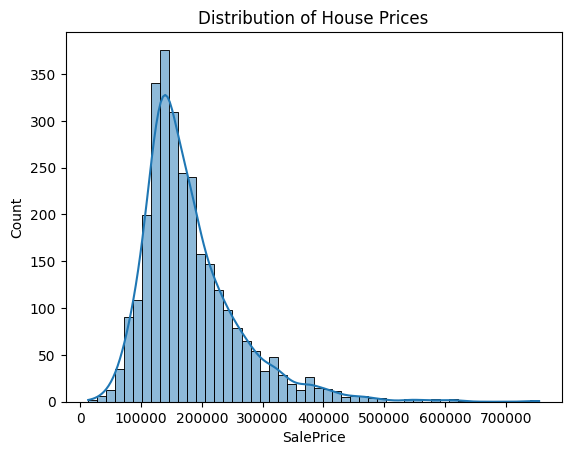

In [7]:
# Visualize target variable (SalePrice)
sns.histplot(df['SalePrice'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.show()

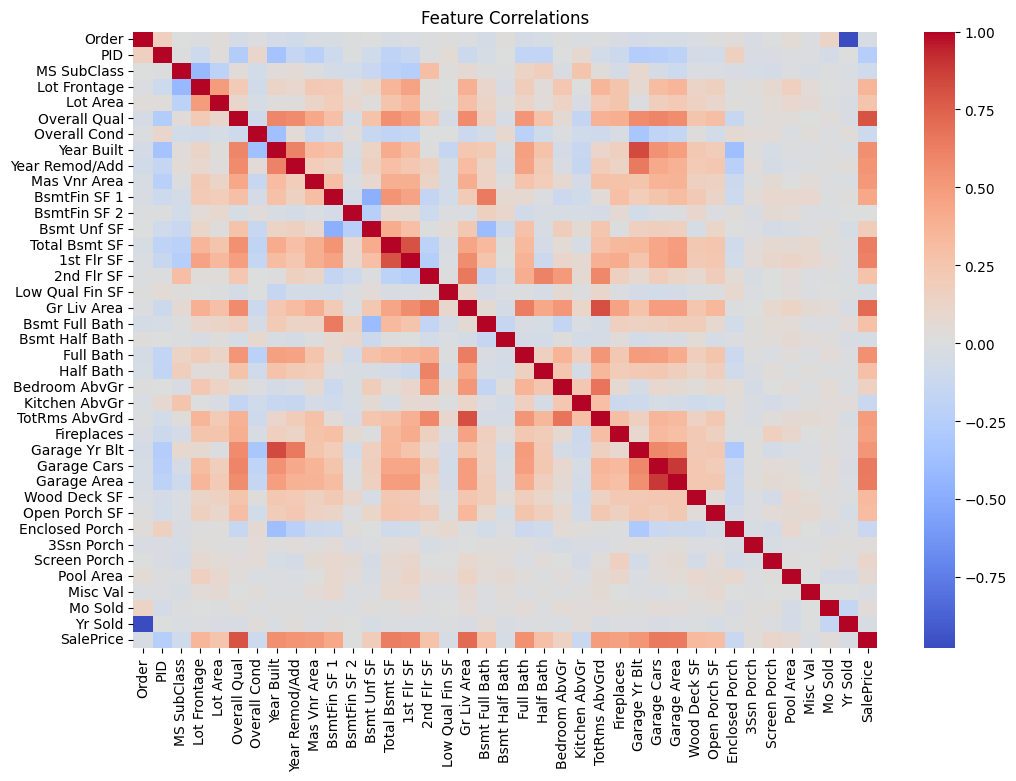

In [8]:
# Compute correlation only for numerical columns
numeric_df = df.select_dtypes(include=['number'])  # Exclude categorical columns

# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlations")
plt.show()

In [9]:
# Handling missing values
num_imputer = SimpleImputer(strategy='median')  # For numerical columns
cat_imputer = SimpleImputer(strategy='most_frequent')  # For categorical columns

In [10]:
# Splitting dataset
X = df.drop(columns=['SalePrice'])
y = df['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(y_train)  # Check columns before transformation
print(y_test)

381     152000
834     185000
1898    101800
678      90000
700      94550
         ...  
1638    155000
1095    176000
1130    207500
1294    122250
860     133900
Name: SalePrice, Length: 2344, dtype: int64
1357    161000
2367    116000
2822    196500
2126    123600
1544    126000
         ...  
2268    187500
456     552000
462     173000
2168    118500
1488    147500
Name: SalePrice, Length: 586, dtype: int64


In [14]:
# Identify numerical and categorical columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = X.select_dtypes(include=['object']).columns.tolist()

In [15]:
X[cat_cols].head()

,MS Zoning,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,...,Garage Type,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,P,NaN,NaN,NaN,WD,Normal
1,RH,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,NaN,NaN,Gar2,WD,Normal
3,RL,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,...,Attchd,Fin,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,...,Attchd,Fin,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal


In [16]:
for col in cat_cols:
    print(f"Unique value counts for column '{col}':")
    print(X[col].value_counts())
    print("\n")

Unique value counts for column 'MS Zoning':
MS Zoning
RL         2273
RM          462
FV          139
RH           27
C (all)      25
I (all)       2
A (agr)       2
Name: count, dtype: int64


Unique value counts for column 'Street':
Street
Pave    2918
Grvl      12
Name: count, dtype: int64


Unique value counts for column 'Alley':
Alley
Grvl    120
Pave     78
Name: count, dtype: int64


Unique value counts for column 'Lot Shape':
Lot Shape
Reg    1859
IR1     979
IR2      76
IR3      16
Name: count, dtype: int64


Unique value counts for column 'Land Contour':
Land Contour
Lvl    2633
HLS     120
Bnk     117
Low      60
Name: count, dtype: int64


Unique value counts for column 'Utilities':
Utilities
AllPub    2927
NoSewr       2
NoSeWa       1
Name: count, dtype: int64


Unique value counts for column 'Lot Config':
Lot Config
Inside     2140
Corner      511
CulDSac     180
FR2          85
FR3          14
Name: count, dtype: int64


Unique value counts for column 'Land Slope':
Land

In [17]:
# Feature engineering: Encoding categorical variables
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Scaling numerical features
scaler = StandardScaler()

In [18]:
# Column Transformer
preprocessor = ColumnTransformer([
    ('num', Pipeline([('imputer', num_imputer), ('scaler', scaler)]), num_cols),
    ('cat', Pipeline([('imputer', cat_imputer), ('encoder', encoder)]), cat_cols)
])

In [19]:
# Apply transformations
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [22]:
X_train_transformed

array([[-1.28416649, -0.99127325, -0.87181667, ...,  1.        ,
         0.        ,  0.        ],
       [-0.74667397,  1.01834864,  0.06290638, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.51578087, -0.95379663,  0.76394867, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.39546473, -0.98527787,  0.06290638, ...,  0.        ,
         1.        ,  0.        ],
       [-0.20087583,  0.99520579, -0.17077438, ...,  0.        ,
         1.        ,  0.        ],
       [-0.71582451,  1.02233507,  0.64710829, ...,  0.        ,
         1.        ,  0.        ]])

In [20]:
print("Data Preprocessing Completed Successfully!")

Data Preprocessing Completed Successfully!


✅ What We've Done in Step 1

✔ Loaded and explored the Ames Housing Dataset

✔ Checked missing values and data types

✔ Visualized target variable distribution

✔ Created a correlation heatmap

✔ Handled missing values with appropriate strategies

✔ Encoded categorical features

✔ Scaled numerical features

✔ Split data into training and testing sets

✅ Step 2: Model Selection & Training

Now, we'll:

✔ Establish a baseline model for comparison.

✔ Train at least three different models (e.g., Linear Regression, Random Forest, XGBoost).

✔ Perform hyperparameter tuning to optimize performance.

✔ Use cross-validation (k-fold) for robustness.

In [29]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
# Baseline Model (Mean SalePrice Prediction)
baseline_pred = np.mean(y_train)
y_baseline_pred = np.full_like(y_test, baseline_pred)
baseline_mae = mean_absolute_error(y_test, y_baseline_pred)
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_baseline_pred))
print(f"\nBaseline Model - MAE: {baseline_mae:.2f}, RMSE: {baseline_rmse:.2f}\n")


Baseline Model - MAE: 64611.38, RMSE: 90222.40



In [31]:
# Function to evaluate models with cross-validation
def evaluate_model(model, X_train, y_train):
    scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=5)
    return -np.mean(scores)

In [32]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

In [33]:
# Evaluate each model
cv_results = {}
for name, model in models.items():
    print(f"Evaluating {name}...")
    cv_results[name] = evaluate_model(model, X_train_transformed, y_train)
    print(f"{name} CV MAE: {cv_results[name]:.2f}\n")

Evaluating Linear Regression...
Linear Regression CV MAE: 16502.68

Evaluating Random Forest...
Random Forest CV MAE: 15980.62

Evaluating XGBoost...
XGBoost CV MAE: 15767.67



In [34]:
# Hyperparameter Tuning (Grid Search for Random Forest & XGBoost)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None]
}
param_grid_xgb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1]
}

rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=5, scoring='neg_mean_absolute_error')
xgb_grid = GridSearchCV(XGBRegressor(random_state=42), param_grid_xgb, cv=5, scoring='neg_mean_absolute_error')

In [35]:
print("\nTuning Random Forest...")
rf_grid.fit(X_train_transformed, y_train)
print("Best RF Params:", rf_grid.best_params_)

print("\nTuning XGBoost...")
xgb_grid.fit(X_train_transformed, y_train)
print("Best XGB Params:", xgb_grid.best_params_)


Tuning Random Forest...
Best RF Params: {'max_depth': 20, 'n_estimators': 200}

Tuning XGBoost...
Best XGB Params: {'learning_rate': 0.1, 'n_estimators': 200}


In [36]:
# Final Model Training
final_rf = RandomForestRegressor(**rf_grid.best_params_, random_state=42)
final_xgb = XGBRegressor(**xgb_grid.best_params_, random_state=42)

final_rf.fit(X_train_transformed, y_train)
final_xgb.fit(X_train_transformed, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [37]:
# Predictions
y_pred_rf = final_rf.predict(X_test_transformed)
y_pred_xgb = final_xgb.predict(X_test_transformed)

In [38]:
# Evaluate Final Models
def print_metrics(model_name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R2: {r2:.2f}\n")

In [39]:
print_metrics("Random Forest", y_test, y_pred_rf)
print_metrics("XGBoost", y_test, y_pred_xgb)


Random Forest - MAE: 15846.29, RMSE: 26837.07, R2: 0.91

XGBoost - MAE: 14880.93, RMSE: 23881.14, R2: 0.93



🚀 Step 3: Model Evaluation & Interpretation

Now that we have chosen XGBoost as the best model, let's analyze how well it performs and interpret its predictions.

✅ Key Evaluations in Step 3

1️⃣ Feature Importance Analysis – Which features contribute the most?

2️⃣ Residual Analysis – Checking how well the model captures patterns

3️⃣ Error Distribution – Understanding how errors are spread

4️⃣ SHAP (SHapley Additive exPlanations) Values – Interpretable ML insights

1️⃣ Feature Importance Analysis

✅ Purpose:

Identifies which features impact predictions the most

Helps in feature selection for future improvements

<ipython-input-43-4d3c4db6e6da>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette="viridis")


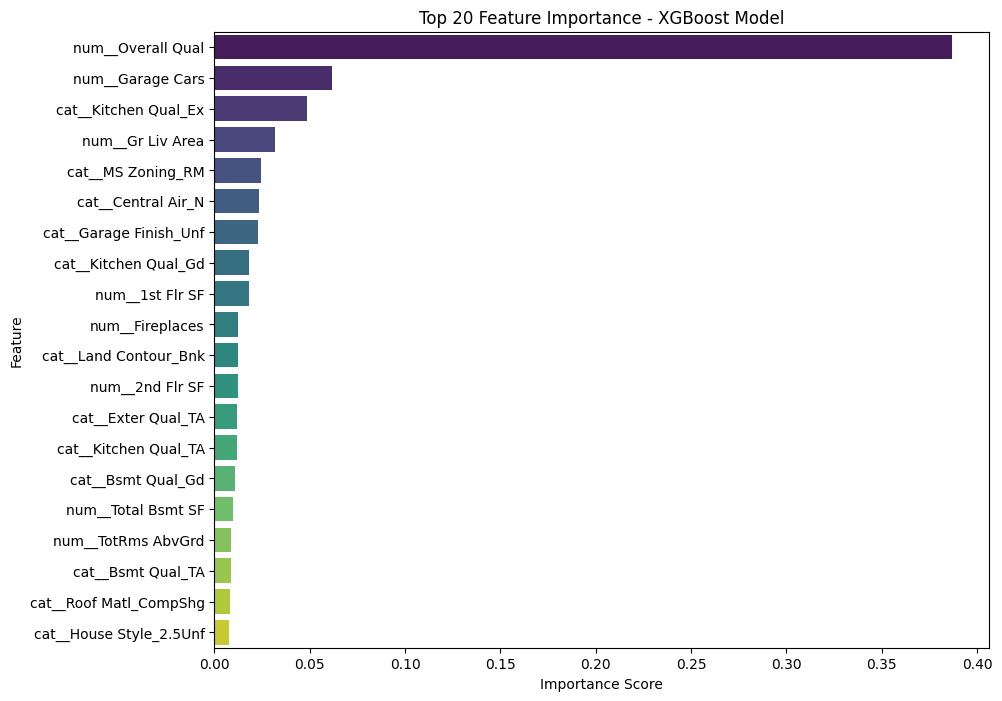

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance from XGBoost
feature_importance = final_xgb.feature_importances_

# Get feature names from the preprocessor
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame for easier handling
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})

# Sort by importance and select top N features (e.g., top 20)
N = 20  # Number of top features to display
top_features = importance_df.sort_values(by='Importance', ascending=False).head(N)

# Plotting the top N features
plt.figure(figsize=(10, 8))  # Adjust figure size if needed
sns.barplot(x='Importance', y='Feature', data=top_features, palette="viridis")
plt.title(f"Top {N} Feature Importance - XGBoost Model")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

2️⃣ Residual Analysis

✅ Purpose:

Residuals should be centered around 0 (good model fit)

Detects if the model has systematic bias

**Residual Analysis (Checking Model Fit)**

What are Residuals?

Residuals are the difference between actual and predicted values:

Residual=Actual Value−Predicted Value

A good model should have randomly distributed residuals around zero

**Why is Residual Analysis Important?**

✅ If residuals are normally distributed (bell curve shape) → Model is making good predictions.

✅ If residuals show skewness (shifted left or right) → Model is biased and may need improvements.

✅ If residuals have multiple peaks → Model might be missing important patterns in the data.

✅ If residuals are spread out widely → Model has high errors; tuning is needed.

🔍 What benefit do you get from this?

It tells you whether your model is systematically biased (i.e., under-predicting or over-predicting).

If residuals don’t follow a normal pattern, you may need to transform variables or use a different model.

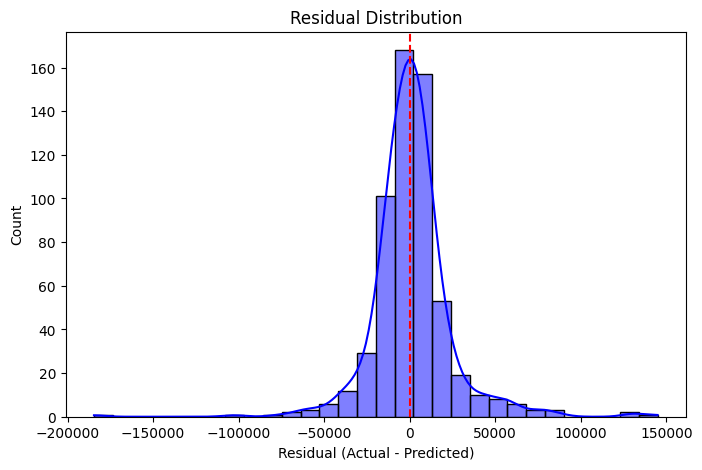

In [44]:
import numpy as np

residuals = y_test - y_pred_xgb

plt.figure(figsize=(8, 5))
sns.histplot(residuals, bins=30, kde=True, color="blue")
plt.axvline(x=0, color="red", linestyle="--")
plt.xlabel("Residual (Actual - Predicted)")
plt.title("Residual Distribution")
plt.show()


3️⃣ Error Distribution vs. Predicted
Values (Checking Model Consistency)

This plot checks whether our model performs equally well across all predictions.

✅ Purpose:

No clear pattern → Model captures data well

Curved shape → Potential non-linearity not handled well

**How to Interpret This Plot?**
✅ Randomly scattered points (Good Model!)

No visible pattern → Model captures the data well.

Errors are evenly distributed → No systematic bias.

❌ Clear pattern (Bad Model!)

If residuals form a curve → Model is missing a non-linear relationship.

If residuals increase as predictions increase → Model is underperforming on larger values (heteroscedasticity issue).

🔍 What benefit do you get from this?

It reveals problems like overfitting or missing patterns in the data.
Helps decide whether to transform features or use a more complex model.

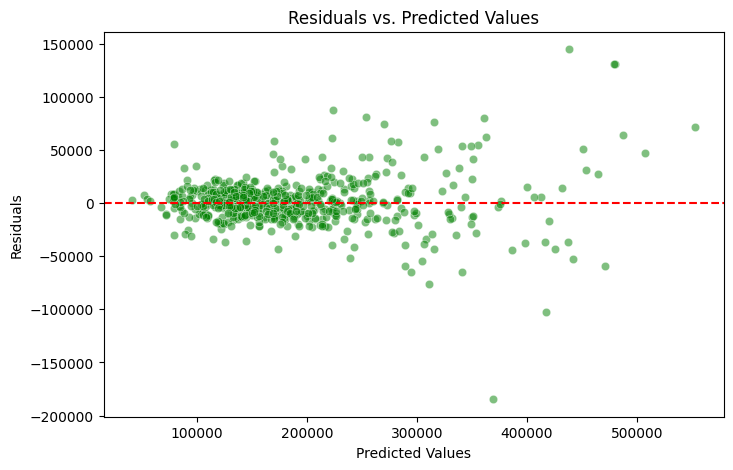

In [45]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred_xgb, y=residuals, alpha=0.5, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Predicted Values")
plt.show()

4️⃣ SHAP Values (Explainable AI - Understanding Model Decisions)

SHAP (SHapley Additive exPlanations) helps understand why the model made certain predictions.

It assigns an importance score to each feature for every prediction.

✅ Purpose:

Shows how each feature impacts predictions

Helps understand black-box models like XGBoost

**How to Interpret the SHAP Plot?**

✅ Features higher up on the plot are the most important.

✅ Red points → Positive impact on prediction (higher output).

✅ Blue points → Negative impact on prediction (lower output).

✅ Wide spread → Feature has a different impact depending on the sample.

🔍 What benefit do you get from this?

Feature Selection: Identify which features are most useful.

Bias Detection: See if some features dominate predictions unfairly.

Debugging: If an unimportant feature has high SHAP values, something is wrong!

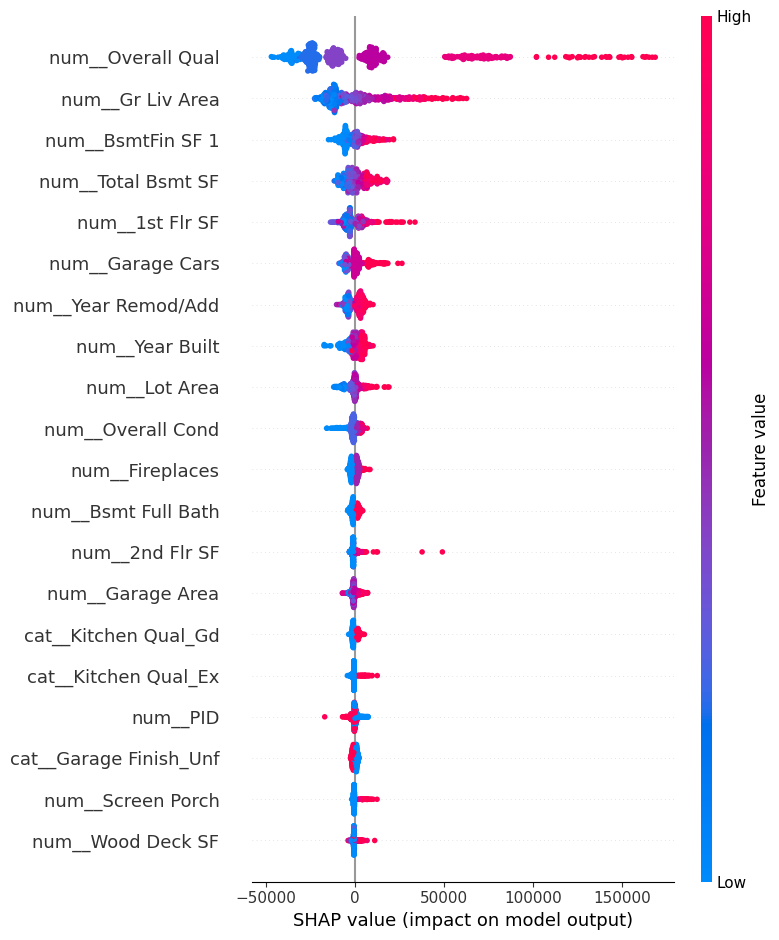

In [48]:
import shap

# Create SHAP explainer
explainer = shap.Explainer(final_xgb)
shap_values = explainer(X_test_transformed)

# SHAP summary plot with feature names
shap.summary_plot(shap_values, X_test_transformed, feature_names=preprocessor.get_feature_names_out() )


🚀 Step 4: Prediction & Inferencing

Now that we have evaluated and interpreted our model, we move to the final step: Making Predictions & Saving the Model for Future Use.

✅ Key Points in Step 4

1️⃣ Making Predictions on Unseen Data

2️⃣ Saving and Loading the Trained Model

3️⃣ Formatting Predictions for Deployment

1️⃣ Making Predictions on Unseen Data

Let’s assume we have a new dataset (new_data.csv) that needs predictions.

***✅ Why is this important? ***

Ensures that our model can generalize to new, unseen data.

Keeps data preprocessing consistent (e.g., same scaling & transformations).

In [51]:
# Load new unseen data
new_data = pd.read_csv("/content/test.csv")

# Instead of creating a new preprocessor, use the original one
# This ensures the same feature engineering steps are applied
new_data_transformed = preprocessor.transform(new_data)

# Make predictions
new_predictions = final_xgb.predict(new_data_transformed)

# Convert to DataFrame
new_data["Predicted Value"] = new_predictions
print(new_data.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0   2127  907135180           20        RL          60.0      8070   Pave   
1    193  903206120           75        RL           NaN      7793   Pave   
2   2407  528181040          120        RL          40.0      6792   Pave   
3     46  528175010          120        RL          44.0      6371   Pave   
4   2478  531379030           60        RL          70.0      8304   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       IR1          Bnk  ...         0     NaN    NaN          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
3   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  GdPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  Predicted Value  
0 

2️⃣ Saving and Loading the Trained Model

To avoid retraining the model every time, we can save and reload it.

✅ Why is this important?

Saves time by reusing the trained model.

Ensures consistency in predictions when deploying in real-world applications.

In [52]:
import joblib

# Save the model
joblib.dump(final_xgb, "xgboost_model.pkl")
joblib.dump(scaler, "scaler.pkl")  # Save the scaler too
print("Model and Scaler saved successfully!")


Model and Scaler saved successfully!


In [54]:
# Load the saved model
loaded_model = joblib.load("xgboost_model.pkl")

# Instead of loading the scaler, use the original preprocessor
# This ensures the same feature engineering steps, including scaling, are applied
new_data_transformed = preprocessor.transform(new_data)  # Apply the same preprocessing
new_predictions = loaded_model.predict(new_data_transformed)

new_data["Predicted Value"] = new_predictions
print(new_data.head())

   Order        PID  MS SubClass MS Zoning  Lot Frontage  Lot Area Street  \
0   2127  907135180           20        RL          60.0      8070   Pave   
1    193  903206120           75        RL           NaN      7793   Pave   
2   2407  528181040          120        RL          40.0      6792   Pave   
3     46  528175010          120        RL          44.0      6371   Pave   
4   2478  531379030           60        RL          70.0      8304   Pave   

  Alley Lot Shape Land Contour  ... Pool Area Pool QC  Fence Misc Feature  \
0   NaN       Reg          Lvl  ...         0     NaN    NaN          NaN   
1   NaN       IR1          Bnk  ...         0     NaN    NaN          NaN   
2   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
3   NaN       IR1          Lvl  ...         0     NaN    NaN          NaN   
4   NaN       IR1          Lvl  ...         0     NaN  GdPrv          NaN   

  Misc Val Mo Sold Yr Sold Sale Type  Sale Condition  Predicted Value  
0 

3️⃣ Formatting Predictions for Deployment

Let’s store predictions in a structured format (CSV file) for further use.

In [55]:
# Save predictions to CSV
new_data.to_csv("predictions.csv", index=False)
print("Predictions saved successfully!")

Predictions saved successfully!


✅ Why is this important?

Makes it easy to share and analyze predictions.

Helps in reporting and decision-making in real-world applications.